In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
df=pd.read_csv("AB_US_2020.csv", delimiter = ',', low_memory=False)

In [5]:
df

id                                               name  \
0          38585    Charming Victorian home - twin beds + breakfast   
1          80905                                   French Chic Loft   
2         108061  Walk to stores/parks/downtown. Fenced yard/Pet...   
3         155305                 Cottage! BonPaul + Sharky's Hostel   
4         160594                                Historic Grove Park   
...          ...                                                ...   
226025  45506143                          DC Hidden In Plain "Site"   
226026  45511428  DC 3 BR w/ screen porch 3 blck to metro w/ par...   
226027  45514685  Charming Penthouse Apt w/ Rooftop Terrace in L...   
226028  45516412                Adams Morgan/Nat'l Zoo 1 BR Apt #32   
226029  45517735    Beautiful large one-bedroom w/ washer and dryer   

          host_id  host_name neighbourhood_group  \
0          165529    Evelyne                 NaN   
1          427027    Celeste                 NaN   
2          320564       Lisa                 NaN   
3          746673    BonPaul                 NaN   
4          769252  Elizabeth                 NaN   
...           ...        ...                 ...   
226025   25973146      Marci                 NaN   
226026  231133074     Thomas                 NaN   
226027   33758935     Bassem                 NaN   
226028   23193071    Michael                 NaN   
226029   17789858       Adam                 NaN   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -82.627920     Private room     60               1                138   
1      -82.555400  Entire home/apt    470               1                114   
2      -82.555630  Entire home/apt     75              30                 89   
3      -82.595780  Entire home/apt     90               1                267   
4      -82.541270     Private room    125              30                 58   
...           ...              ...    ...             ...                ...   
226025 -77.029730  Entire home/apt    104               1                  0   
226026 -76.990980  Entire home/apt    151               2                  0   
226027 -77.033540  Entire home/apt    240               2                  0   
226028 -77.044360  Entire home/apt     60              21                  0   
226029 -77.009431  Entire home/apt     79               7                  0   

       last_review  reviews_per_month  calculated_host_listings_count  \
0         16/02/20               1.14                               1   
1         07/09/20               1.03                              11   
2         30/11/19               0.81                               2   
3         22/09/20               2.39                               5   
4         19/10/15               0.52                               1   
...            ...                ...                             ...   
226025         NaN                NaN                               2   
226026         NaN                NaN                               1   
226027         NaN                NaN                

In [6]:
df = df.drop(columns=['neighbourhood_group', 'last_review'])  #dropping columns with many empty values

In [7]:
df

id                                               name  \
0          38585    Charming Victorian home - twin beds + breakfast   
1          80905                                   French Chic Loft   
2         108061  Walk to stores/parks/downtown. Fenced yard/Pet...   
3         155305                 Cottage! BonPaul + Sharky's Hostel   
4         160594                                Historic Grove Park   
...          ...                                                ...   
226025  45506143                          DC Hidden In Plain "Site"   
226026  45511428  DC 3 BR w/ screen porch 3 blck to metro w/ par...   
226027  45514685  Charming Penthouse Apt w/ Rooftop Terrace in L...   
226028  45516412                Adams Morgan/Nat'l Zoo 1 BR Apt #32   
226029  45517735    Beautiful large one-bedroom w/ washer and dryer   

          host_id  host_name  \
0          165529    Evelyne   
1          427027    Celeste   
2          320564       Lisa   
3          746673    BonPaul   
4          769252  Elizabeth   
...           ...        ...   
226025   25973146      Marci   
226026  231133074     Thomas   
226027   33758935     Bassem   
226028   23193071    Michael   
226029   17789858       Adam   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -82.627920     Private room     60               1                138   
1      -82.555400  Entire home/apt    470               1                114   
2      -82.555630  Entire home/apt     75              30                 89   
3      -82.595780  Entire home/apt     90               1                267   
4      -82.541270     Private room    125              30                 58   
...           ...              ...    ...             ...                ...   
226025 -77.029730  Entire home/apt    104               1                  0   
226026 -76.990980  Entire home/apt    151               2                  0   
226027 -77.033540  Entire home/apt    240               2                  0   
226028 -77.044360  Entire home/apt     60              21                  0   
226029 -77.009431  Entire home/apt     79               7                  0   

        reviews_per_month  calculated_host_listings_count  availability_365  \
0                    1.14                               1                 0   
1                    1.03                              11               288   
2                    0.81                               2               298   
3                    2.39                               5                 0   
4                    0.52                               1                 0   
...                   ...                             ...               ...   
226025                NaN                               2                99   
226026                NaN                               1               300   
226027                NaN                               1               173   
226028                NaN                               5               362   
226029                NaN                               2                62   

 

In [8]:
df.city.value_counts()

New York City        45756
Los Angeles          31536
Hawaii               22434
San Diego            12404
Broward County       10858
Austin               10436
Clark County          8408
Washington D.C.       7350
San Clara Country     7091
San Francisco         7053
Seattle               6575
Twin Cities MSA       6470
New Orleans           6408
Chicago               6397
Nashville             6139
Portland              4281
Denver                4200
Rhode Island          3884
Boston                3339
Oakland               3204
San Mateo County      2855
Jersey City           2488
Asheville             2074
Santa Cruz County     1571
Columbus              1409
Cambridge             1029
Salem                  202
Pacific Grove          179
Name: city, dtype: int64

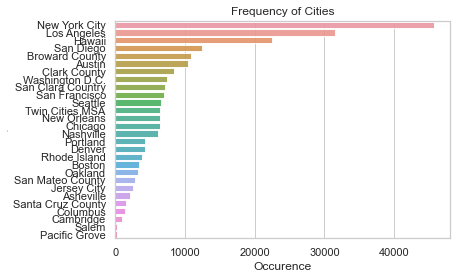

<Figure size 2880x1440 with 0 Axes>

In [9]:
states_count = df['city'].value_counts()
sns.set(style="whitegrid")
sns.barplot(states_count.values,states_count.index, alpha=0.9)
plt.title('Frequency of Cities')
plt.ylabel('State', fontsize=1)
plt.xlabel('Occurence', fontsize=12)
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plt.show()

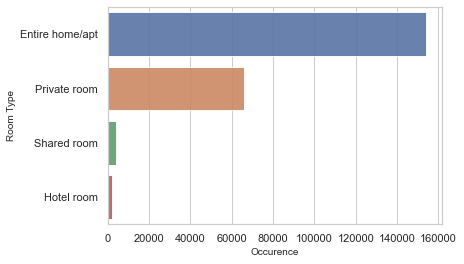

In [10]:
room_count = df['room_type'].value_counts()
sns.set(style="whitegrid")
sns.barplot(room_count.values,room_count.index, alpha=0.9)
plt.ylabel('Room Type', fontsize=10)
plt.xlabel('Occurence', fontsize=10)
plt.show()

In [11]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [12]:
US = folium.Map(location=[37.09024, -95.712891],zoom_start =4)
heat_map = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_map).add_to(US)

In [13]:
US

In [14]:
df

id                                               name  \
0          38585    Charming Victorian home - twin beds + breakfast   
1          80905                                   French Chic Loft   
2         108061  Walk to stores/parks/downtown. Fenced yard/Pet...   
3         155305                 Cottage! BonPaul + Sharky's Hostel   
4         160594                                Historic Grove Park   
...          ...                                                ...   
226025  45506143                          DC Hidden In Plain "Site"   
226026  45511428  DC 3 BR w/ screen porch 3 blck to metro w/ par...   
226027  45514685  Charming Penthouse Apt w/ Rooftop Terrace in L...   
226028  45516412                Adams Morgan/Nat'l Zoo 1 BR Apt #32   
226029  45517735    Beautiful large one-bedroom w/ washer and dryer   

          host_id  host_name  \
0          165529    Evelyne   
1          427027    Celeste   
2          320564       Lisa   
3          746673    BonPaul   
4          769252  Elizabeth   
...           ...        ...   
226025   25973146      Marci   
226026  231133074     Thomas   
226027   33758935     Bassem   
226028   23193071    Michael   
226029   17789858       Adam   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -82.627920     Private room     60               1                138   
1      -82.555400  Entire home/apt    470               1                114   
2      -82.555630  Entire home/apt     75              30                 89   
3      -82.595780  Entire home/apt     90               1                267   
4      -82.541270     Private room    125              30                 58   
...           ...              ...    ...             ...                ...   
226025 -77.029730  Entire home/apt    104               1                  0   
226026 -76.990980  Entire home/apt    151               2                  0   
226027 -77.033540  Entire home/apt    240               2                  0   
226028 -77.044360  Entire home/apt     60              21                  0   
226029 -77.009431  Entire home/apt     79               7                  0   

        reviews_per_month  calculated_host_listings_count  availability_365  \
0                    1.14                               1                 0   
1                    1.03                              11               288   
2                    0.81                               2               298   
3                    2.39                               5                 0   
4                    0.52                               1                 0   
...                   ...                             ...               ...   
226025                NaN                               2                99   
226026                NaN                               1               300   
226027                NaN                               1               173   
226028                NaN                               5               362   
226029                NaN                               2                62   

 

In [15]:
df = df.drop(columns=['host_id'])  #dropping column host_id

In [16]:
df.shape

(226030, 14)

In [17]:
#df=df[df['minimum_nights'] < 30]

In [18]:
#df.shape

In [19]:
first_column = df.pop('price')

In [20]:
first_column

0          60
1         470
2          75
3          90
4         125
         ... 
226025    104
226026    151
226027    240
226028     60
226029     79
Name: price, Length: 226030, dtype: int64

In [21]:
df.insert(0, 'price', first_column)

In [22]:
df

price        id                                               name  \
0          60     38585    Charming Victorian home - twin beds + breakfast   
1         470     80905                                   French Chic Loft   
2          75    108061  Walk to stores/parks/downtown. Fenced yard/Pet...   
3          90    155305                 Cottage! BonPaul + Sharky's Hostel   
4         125    160594                                Historic Grove Park   
...       ...       ...                                                ...   
226025    104  45506143                          DC Hidden In Plain "Site"   
226026    151  45511428  DC 3 BR w/ screen porch 3 blck to metro w/ par...   
226027    240  45514685  Charming Penthouse Apt w/ Rooftop Terrace in L...   
226028     60  45516412                Adams Morgan/Nat'l Zoo 1 BR Apt #32   
226029     79  45517735    Beautiful large one-bedroom w/ washer and dryer   

        host_name                                      neighbourhood  \
0         Evelyne                                              28804   
1         Celeste                                              28801   
2            Lisa                                              28801   
3         BonPaul                                              28806   
4       Elizabeth                                              28801   
...           ...                                                ...   
226025      Marci  Downtown, Chinatown, Penn Quarters, Mount Vern...   
226026     Thomas                      Brookland, Brentwood, Langdon   
226027     Bassem                                 Shaw, Logan Circle   
226028    Michael     Kalorama Heights, Adams Morgan, Lanier Heights   
226029       Adam  Edgewood, Bloomingdale, Truxton Circle, Eckington   

         latitude  longitude        room_type  minimum_nights  \
0       35.651460 -82.627920     Private room               1   
1       35.597790 -82.555400  Entire home/apt               1   
2       35.606700 -82.555630  Entire home/apt              30   
3       35.578640 -82.595780  Entire home/apt               1   
4       35.614420 -82.541270     Private room              30   
...           ...        ...              ...             ...   
226025  38.903880 -77.029730  Entire home/apt               1   
226026  38.920820 -76.990980  Entire home/apt               2   
226027  38.911170 -77.033540  Entire home/apt               2   
226028  38.926630 -77.044360  Entire home/apt              21   
226029  38.911569 -77.009431  Entire home/apt               7   

        number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     138               1.14                               1   
1                     114               1.03                              11   
2                      89               0.81                               2   
3                     267               2.39                               5   
4                      58               0.52                               1   
...                   ...                ...                             ...   
226025                  0                NaN                               2   
226026                  0                NaN                               1   
226027                  0                NaN                               1   
226028                  0                NaN                               5   
226029                  0                NaN                               2   

        availability_365             city  
0                      0        Asheville  
1                    288        Asheville  
2                    298        Asheville  
3                      0        Asheville  
4                      0        Asheville  
...                  ...              ...  
226025                99  Washington D.C.  
226026               300  Washington D.C.  
226027               173  Washington D.C.  
226028               362

In [23]:
first_column = df.pop('room_type')

In [24]:
df.insert(1, 'room_type', first_column)

In [25]:
df

price        room_type        id  \
0          60     Private room     38585   
1         470  Entire home/apt     80905   
2          75  Entire home/apt    108061   
3          90  Entire home/apt    155305   
4         125     Private room    160594   
...       ...              ...       ...   
226025    104  Entire home/apt  45506143   
226026    151  Entire home/apt  45511428   
226027    240  Entire home/apt  45514685   
226028     60  Entire home/apt  45516412   
226029     79  Entire home/apt  45517735   

                                                     name  host_name  \
0         Charming Victorian home - twin beds + breakfast    Evelyne   
1                                        French Chic Loft    Celeste   
2       Walk to stores/parks/downtown. Fenced yard/Pet...       Lisa   
3                      Cottage! BonPaul + Sharky's Hostel    BonPaul   
4                                     Historic Grove Park  Elizabeth   
...                                                   ...        ...   
226025                          DC Hidden In Plain "Site"      Marci   
226026  DC 3 BR w/ screen porch 3 blck to metro w/ par...     Thomas   
226027  Charming Penthouse Apt w/ Rooftop Terrace in L...     Bassem   
226028                Adams Morgan/Nat'l Zoo 1 BR Apt #32    Michael   
226029    Beautiful large one-bedroom w/ washer and dryer       Adam   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0      -82.627920               1                138               1.14   
1      -82.555400               1                114               1.03   
2      -82.555630              30                 89               0.81   
3      -82.595780               1                267               2.39   
4      -82.541270              30                 58               0.52   
...           ...             ...                ...                ...   
226025 -77.029730               1                  0                NaN   
226026 -76.990980               2                  0                NaN   
226027 -77.033540               2                  0                NaN   
226028 -77.044360              21                  0                NaN   
226029 -77.009431               7                  0                NaN   

        calculated_host_listings_count  availability_365             city  
0                                    1                 0        Asheville  
1                                   11               288        Asheville  
2                                    2               298        Asheville  
3                                    5                 0        Asheville  
4                                    1                 0        Asheville  
...                                ...               ...              ...  
226025                               2                99  Washington D.C.  
226026                               1               300  Washington D.C.  
226027                               1               173  Washington D.C.  
226028                               5               362  Washington D.C.  
226029      

In [26]:
first_column = df.pop('city')

In [27]:
df.insert(2, 'city', first_column)

In [28]:
df

price        room_type             city        id  \
0          60     Private room        Asheville     38585   
1         470  Entire home/apt        Asheville     80905   
2          75  Entire home/apt        Asheville    108061   
3          90  Entire home/apt        Asheville    155305   
4         125     Private room        Asheville    160594   
...       ...              ...              ...       ...   
226025    104  Entire home/apt  Washington D.C.  45506143   
226026    151  Entire home/apt  Washington D.C.  45511428   
226027    240  Entire home/apt  Washington D.C.  45514685   
226028     60  Entire home/apt  Washington D.C.  45516412   
226029     79  Entire home/apt  Washington D.C.  45517735   

                                                     name  host_name  \
0         Charming Victorian home - twin beds + breakfast    Evelyne   
1                                        French Chic Loft    Celeste   
2       Walk to stores/parks/downtown. Fenced yard/Pet...       Lisa   
3                      Cottage! BonPaul + Sharky's Hostel    BonPaul   
4                                     Historic Grove Park  Elizabeth   
...                                                   ...        ...   
226025                          DC Hidden In Plain "Site"      Marci   
226026  DC 3 BR w/ screen porch 3 blck to metro w/ par...     Thomas   
226027  Charming Penthouse Apt w/ Rooftop Terrace in L...     Bassem   
226028                Adams Morgan/Nat'l Zoo 1 BR Apt #32    Michael   
226029    Beautiful large one-bedroom w/ washer and dryer       Adam   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0      -82.627920               1                138               1.14   
1      -82.555400               1                114               1.03   
2      -82.555630              30                 89               0.81   
3      -82.595780               1                267               2.39   
4      -82.541270              30                 58               0.52   
...           ...             ...                ...                ...   
226025 -77.029730               1                  0                NaN   
226026 -76.990980               2                  0                NaN   
226027 -77.033540               2                  0                NaN   
226028 -77.044360              21                  0                NaN   
226029 -77.009431               7                  0                NaN   

        calculated_host_listings_count  availability_365  
0                                    1                 0  
1                                   11               288  
2                                    2               298  
3                                    5                 0  
4                                    1                 0  
...                                ...               ...  
226025                               2                99  
226026                               1               300  
226027                               1               173  
226028                               5               3

In [29]:
df = df.drop(columns=['name','host_name'])

In [30]:
df

price        room_type             city        id  \
0          60     Private room        Asheville     38585   
1         470  Entire home/apt        Asheville     80905   
2          75  Entire home/apt        Asheville    108061   
3          90  Entire home/apt        Asheville    155305   
4         125     Private room        Asheville    160594   
...       ...              ...              ...       ...   
226025    104  Entire home/apt  Washington D.C.  45506143   
226026    151  Entire home/apt  Washington D.C.  45511428   
226027    240  Entire home/apt  Washington D.C.  45514685   
226028     60  Entire home/apt  Washington D.C.  45516412   
226029     79  Entire home/apt  Washington D.C.  45517735   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0      -82.627920               1                138               1.14   
1      -82.555400               1                114               1.03   
2      -82.555630              30                 89               0.81   
3      -82.595780               1                267               2.39   
4      -82.541270              30                 58               0.52   
...           ...             ...                ...                ...   
226025 -77.029730               1                  0                NaN   
226026 -76.990980               2                  0                NaN   
226027 -77.033540               2                  0                NaN   
226028 -77.044360              21                  0                NaN   
226029 -77.009431               7                  0                NaN   

        calculated_host_listings_count  availability_365  
0                                    1                 0  
1                                   11               288  
2                                    2               298  
3                                    5                 0  
4                                    1                 0  
...                                ...               ...  
226025                               2                99  
226026                               1               300  
226027                               1               173  
226028                               5               362  
226029                               2                62  

[226030 rows x 12 columns]

In [31]:
df = df.drop(columns=['neighbourhood'])

In [32]:
df

price        room_type             city        id   latitude  \
0          60     Private room        Asheville     38585  35.651460   
1         470  Entire home/apt        Asheville     80905  35.597790   
2          75  Entire home/apt        Asheville    108061  35.606700   
3          90  Entire home/apt        Asheville    155305  35.578640   
4         125     Private room        Asheville    160594  35.614420   
...       ...              ...              ...       ...        ...   
226025    104  Entire home/apt  Washington D.C.  45506143  38.903880   
226026    151  Entire home/apt  Washington D.C.  45511428  38.920820   
226027    240  Entire home/apt  Washington D.C.  45514685  38.911170   
226028     60  Entire home/apt  Washington D.C.  45516412  38.926630   
226029     79  Entire home/apt  Washington D.C.  45517735  38.911569   

        longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0      -82.627920               1                138               1.14   
1      -82.555400               1                114               1.03   
2      -82.555630              30                 89               0.81   
3      -82.595780               1                267               2.39   
4      -82.541270              30                 58               0.52   
...           ...             ...                ...                ...   
226025 -77.029730               1                  0                NaN   
226026 -76.990980               2                  0                NaN   
226027 -77.033540               2                  0                NaN   
226028 -77.044360              21                  0                NaN   
226029 -77.009431               7                  0                NaN   

        calculated_host_listings_count  availability_365  
0                                    1                 0  
1                                   11               288  
2                                    2               298  
3                                    5                 0  
4                                    1                 0  
...                                ...               ...  
226025                               2                99  
226026                               1               300  
226027                               1               173  
226028                               5               362  
226029                               2                62  

[226030 rows x 11 columns]

In [33]:
df.isnull().sum()

price                                 0
room_type                             0
city                                  0
id                                    0
latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 48602
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [34]:
df.number_of_reviews[df.number_of_reviews == 0].count()

48602

In [35]:
df[['reviews_per_month']] = df[['reviews_per_month']].fillna(value=0)

In [36]:
df

price        room_type             city        id   latitude  \
0          60     Private room        Asheville     38585  35.651460   
1         470  Entire home/apt        Asheville     80905  35.597790   
2          75  Entire home/apt        Asheville    108061  35.606700   
3          90  Entire home/apt        Asheville    155305  35.578640   
4         125     Private room        Asheville    160594  35.614420   
...       ...              ...              ...       ...        ...   
226025    104  Entire home/apt  Washington D.C.  45506143  38.903880   
226026    151  Entire home/apt  Washington D.C.  45511428  38.920820   
226027    240  Entire home/apt  Washington D.C.  45514685  38.911170   
226028     60  Entire home/apt  Washington D.C.  45516412  38.926630   
226029     79  Entire home/apt  Washington D.C.  45517735  38.911569   

        longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0      -82.627920               1                138               1.14   
1      -82.555400               1                114               1.03   
2      -82.555630              30                 89               0.81   
3      -82.595780               1                267               2.39   
4      -82.541270              30                 58               0.52   
...           ...             ...                ...                ...   
226025 -77.029730               1                  0               0.00   
226026 -76.990980               2                  0               0.00   
226027 -77.033540               2                  0               0.00   
226028 -77.044360              21                  0               0.00   
226029 -77.009431               7                  0               0.00   

        calculated_host_listings_count  availability_365  
0                                    1                 0  
1                                   11               288  
2                                    2               298  
3                                    5                 0  
4                                    1                 0  
...                                ...               ...  
226025                               2                99  
226026                               1               300  
226027                               1               173  
226028                               5               362  
226029                               2                62  

[226030 rows x 11 columns]

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['city_cat'] = le.fit_transform(df['city'])

In [38]:
df

price        room_type             city        id   latitude  \
0          60     Private room        Asheville     38585  35.651460   
1         470  Entire home/apt        Asheville     80905  35.597790   
2          75  Entire home/apt        Asheville    108061  35.606700   
3          90  Entire home/apt        Asheville    155305  35.578640   
4         125     Private room        Asheville    160594  35.614420   
...       ...              ...              ...       ...        ...   
226025    104  Entire home/apt  Washington D.C.  45506143  38.903880   
226026    151  Entire home/apt  Washington D.C.  45511428  38.920820   
226027    240  Entire home/apt  Washington D.C.  45514685  38.911170   
226028     60  Entire home/apt  Washington D.C.  45516412  38.926630   
226029     79  Entire home/apt  Washington D.C.  45517735  38.911569   

        longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0      -82.627920               1                138               1.14   
1      -82.555400               1                114               1.03   
2      -82.555630              30                 89               0.81   
3      -82.595780               1                267               2.39   
4      -82.541270              30                 58               0.52   
...           ...             ...                ...                ...   
226025 -77.029730               1                  0               0.00   
226026 -76.990980               2                  0               0.00   
226027 -77.033540               2                  0               0.00   
226028 -77.044360              21                  0               0.00   
226029 -77.009431               7                  0               0.00   

        calculated_host_listings_count  availability_365  city_cat  
0                                    1                 0         0  
1                                   11               288         0  
2                                    2               298         0  
3                                    5                 0         0  
4                                    1                 0         0  
...                                ...               ...       ...  
226025                               2                99        27  
226026                               1               300        27  
226027                               1               173        27  
226028                               5               362        27  
226029                               2                62        27  

[226030 rows x 12 columns]

In [39]:
df = df.drop(columns=['city'])

In [40]:
df

price        room_type        id   latitude  longitude  \
0          60     Private room     38585  35.651460 -82.627920   
1         470  Entire home/apt     80905  35.597790 -82.555400   
2          75  Entire home/apt    108061  35.606700 -82.555630   
3          90  Entire home/apt    155305  35.578640 -82.595780   
4         125     Private room    160594  35.614420 -82.541270   
...       ...              ...       ...        ...        ...   
226025    104  Entire home/apt  45506143  38.903880 -77.029730   
226026    151  Entire home/apt  45511428  38.920820 -76.990980   
226027    240  Entire home/apt  45514685  38.911170 -77.033540   
226028     60  Entire home/apt  45516412  38.926630 -77.044360   
226029     79  Entire home/apt  45517735  38.911569 -77.009431   

        minimum_nights  number_of_reviews  reviews_per_month  \
0                    1                138               1.14   
1                    1                114               1.03   
2                   30                 89               0.81   
3                    1                267               2.39   
4                   30                 58               0.52   
...                ...                ...                ...   
226025               1                  0               0.00   
226026               2                  0               0.00   
226027               2                  0               0.00   
226028              21                  0               0.00   
226029               7                  0               0.00   

        calculated_host_listings_count  availability_365  city_cat  
0                                    1                 0         0  
1                                   11               288         0  
2                                    2               298         0  
3                                    5                 0         0  
4                                    1                 0         0  
...                                ...               ...       ...  
226025                               2                99        27  
226026                               1               300        27  
226027                               1               173        27  
226028                               5               362        27  
226029                               2                62        27  

[226030 rows x 11 columns]

In [41]:
conditions = [
    (df['price'] < 100),
    (df['price'] >= 100) & (df['price'] < 250),
    (df['price'] >= 250) & (df['price'] < 600),
    (df['price'] >= 600) ]

In [42]:
values = ['economic', 'low-mid', 'high-mid','high']

In [43]:
df['price_range'] = np.select(conditions, values)

In [44]:
df

price        room_type        id   latitude  longitude  \
0          60     Private room     38585  35.651460 -82.627920   
1         470  Entire home/apt     80905  35.597790 -82.555400   
2          75  Entire home/apt    108061  35.606700 -82.555630   
3          90  Entire home/apt    155305  35.578640 -82.595780   
4         125     Private room    160594  35.614420 -82.541270   
...       ...              ...       ...        ...        ...   
226025    104  Entire home/apt  45506143  38.903880 -77.029730   
226026    151  Entire home/apt  45511428  38.920820 -76.990980   
226027    240  Entire home/apt  45514685  38.911170 -77.033540   
226028     60  Entire home/apt  45516412  38.926630 -77.044360   
226029     79  Entire home/apt  45517735  38.911569 -77.009431   

        minimum_nights  number_of_reviews  reviews_per_month  \
0                    1                138               1.14   
1                    1                114               1.03   
2                   30                 89               0.81   
3                    1                267               2.39   
4                   30                 58               0.52   
...                ...                ...                ...   
226025               1                  0               0.00   
226026               2                  0               0.00   
226027               2                  0               0.00   
226028              21                  0               0.00   
226029               7                  0               0.00   

        calculated_host_listings_count  availability_365  city_cat price_range  
0                                    1                 0         0    economic  
1                                   11               288         0    high-mid  
2                                    2               298         0    economic  
3                                    5                 0         0    economic  
4                                    1                 0         0     low-mid  
...                                ...               ...       ...         ...  
226025                               2                99        27     low-mid  
226026                               1               300        27     low-mid  
226027                               1               173        27     low-mid  
226028                               5               362        27    economic  
226029                               2                62        27    economic  

[226030 rows x 12 columns]

In [45]:
df['price_range_cat'] = le.fit_transform(df['price_range'])

In [46]:
df

price        room_type        id   latitude  longitude  \
0          60     Private room     38585  35.651460 -82.627920   
1         470  Entire home/apt     80905  35.597790 -82.555400   
2          75  Entire home/apt    108061  35.606700 -82.555630   
3          90  Entire home/apt    155305  35.578640 -82.595780   
4         125     Private room    160594  35.614420 -82.541270   
...       ...              ...       ...        ...        ...   
226025    104  Entire home/apt  45506143  38.903880 -77.029730   
226026    151  Entire home/apt  45511428  38.920820 -76.990980   
226027    240  Entire home/apt  45514685  38.911170 -77.033540   
226028     60  Entire home/apt  45516412  38.926630 -77.044360   
226029     79  Entire home/apt  45517735  38.911569 -77.009431   

        minimum_nights  number_of_reviews  reviews_per_month  \
0                    1                138               1.14   
1                    1                114               1.03   
2                   30                 89               0.81   
3                    1                267               2.39   
4                   30                 58               0.52   
...                ...                ...                ...   
226025               1                  0               0.00   
226026               2                  0               0.00   
226027               2                  0               0.00   
226028              21                  0               0.00   
226029               7                  0               0.00   

        calculated_host_listings_count  availability_365  city_cat  \
0                                    1                 0         0   
1                                   11               288         0   
2                                    2               298         0   
3                                    5                 0         0   
4                                    1                 0         0   
...                                ...               ...       ...   
226025                               2                99        27   
226026                               1               300        27   
226027                               1               173        27   
226028                               5               362        27   
226029                               2                62        27   

       price_range  price_range_cat  
0         economic                0  
1         high-mid                2  
2         economic                0  
3         economic                0  
4          low-mid                3  
...            ...              ...  
226025     low-mid                3  
226026     low-mid                3  
226027     low-mid                3  
226028    economic                0  
226029    economic                0  

[226030 rows x 13 columns]

In [47]:
df = df.drop(columns=['price_range'])

In [48]:
df

price        room_type        id   latitude  longitude  \
0          60     Private room     38585  35.651460 -82.627920   
1         470  Entire home/apt     80905  35.597790 -82.555400   
2          75  Entire home/apt    108061  35.606700 -82.555630   
3          90  Entire home/apt    155305  35.578640 -82.595780   
4         125     Private room    160594  35.614420 -82.541270   
...       ...              ...       ...        ...        ...   
226025    104  Entire home/apt  45506143  38.903880 -77.029730   
226026    151  Entire home/apt  45511428  38.920820 -76.990980   
226027    240  Entire home/apt  45514685  38.911170 -77.033540   
226028     60  Entire home/apt  45516412  38.926630 -77.044360   
226029     79  Entire home/apt  45517735  38.911569 -77.009431   

        minimum_nights  number_of_reviews  reviews_per_month  \
0                    1                138               1.14   
1                    1                114               1.03   
2                   30                 89               0.81   
3                    1                267               2.39   
4                   30                 58               0.52   
...                ...                ...                ...   
226025               1                  0               0.00   
226026               2                  0               0.00   
226027               2                  0               0.00   
226028              21                  0               0.00   
226029               7                  0               0.00   

        calculated_host_listings_count  availability_365  city_cat  \
0                                    1                 0         0   
1                                   11               288         0   
2                                    2               298         0   
3                                    5                 0         0   
4                                    1                 0         0   
...                                ...               ...       ...   
226025                               2                99        27   
226026                               1               300        27   
226027                               1               173        27   
226028                               5               362        27   
226029                               2                62        27   

        price_range_cat  
0                     0  
1                     2  
2                     0  
3                     0  
4                     3  
...                 ...  
226025                3  
226026                3  
226027                3  
226028                0  
226029                0  

[226030 rows x 12 columns]

In [49]:
df = df.drop(columns=['city_cat'])

In [50]:
df

price        room_type        id   latitude  longitude  \
0          60     Private room     38585  35.651460 -82.627920   
1         470  Entire home/apt     80905  35.597790 -82.555400   
2          75  Entire home/apt    108061  35.606700 -82.555630   
3          90  Entire home/apt    155305  35.578640 -82.595780   
4         125     Private room    160594  35.614420 -82.541270   
...       ...              ...       ...        ...        ...   
226025    104  Entire home/apt  45506143  38.903880 -77.029730   
226026    151  Entire home/apt  45511428  38.920820 -76.990980   
226027    240  Entire home/apt  45514685  38.911170 -77.033540   
226028     60  Entire home/apt  45516412  38.926630 -77.044360   
226029     79  Entire home/apt  45517735  38.911569 -77.009431   

        minimum_nights  number_of_reviews  reviews_per_month  \
0                    1                138               1.14   
1                    1                114               1.03   
2                   30                 89               0.81   
3                    1                267               2.39   
4                   30                 58               0.52   
...                ...                ...                ...   
226025               1                  0               0.00   
226026               2                  0               0.00   
226027               2                  0               0.00   
226028              21                  0               0.00   
226029               7                  0               0.00   

        calculated_host_listings_count  availability_365  price_range_cat  
0                                    1                 0                0  
1                                   11               288                2  
2                                    2               298                0  
3                                    5                 0                0  
4                                    1                 0                3  
...                                ...               ...              ...  
226025                               2                99                3  
226026                               1               300                3  
226027                               1               173                3  
226028                               5               362                0  
226029                               2                62                0  

[226030 rows x 11 columns]

In [51]:
df.id.value_counts()

43806155    2
29592050    1
33167637    1
42191151    1
6019373     1
           ..
16937957    1
35128669    1
23219170    1
21026118    1
27060708    1
Name: id, Length: 226029, dtype: int64

In [52]:
df = df.drop(columns=['id'])

In [53]:
df

price        room_type   latitude  longitude  minimum_nights  \
0          60     Private room  35.651460 -82.627920               1   
1         470  Entire home/apt  35.597790 -82.555400               1   
2          75  Entire home/apt  35.606700 -82.555630              30   
3          90  Entire home/apt  35.578640 -82.595780               1   
4         125     Private room  35.614420 -82.541270              30   
...       ...              ...        ...        ...             ...   
226025    104  Entire home/apt  38.903880 -77.029730               1   
226026    151  Entire home/apt  38.920820 -76.990980               2   
226027    240  Entire home/apt  38.911170 -77.033540               2   
226028     60  Entire home/apt  38.926630 -77.044360              21   
226029     79  Entire home/apt  38.911569 -77.009431               7   

        number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     138               1.14                               1   
1                     114               1.03                              11   
2                      89               0.81                               2   
3                     267               2.39                               5   
4                      58               0.52                               1   
...                   ...                ...                             ...   
226025                  0               0.00                               2   
226026                  0               0.00                               1   
226027                  0               0.00                               1   
226028                  0               0.00                               5   
226029                  0               0.00                               2   

        availability_365  price_range_cat  
0                      0                0  
1                    288                2  
2                    298                0  
3                      0                0  
4                      0                3  
...                  ...              ...  
226025                99                3  
226026               300                3  
226027               173                3  
226028               362                0  
226029                62                0  

[226030 rows x 10 columns]

In [54]:
#df['room_type'] = le.fit_transform(df['price_range'])

In [55]:
df = df.drop(columns=['price'])

In [56]:
df

room_type   latitude  longitude  minimum_nights  \
0          Private room  35.651460 -82.627920               1   
1       Entire home/apt  35.597790 -82.555400               1   
2       Entire home/apt  35.606700 -82.555630              30   
3       Entire home/apt  35.578640 -82.595780               1   
4          Private room  35.614420 -82.541270              30   
...                 ...        ...        ...             ...   
226025  Entire home/apt  38.903880 -77.029730               1   
226026  Entire home/apt  38.920820 -76.990980               2   
226027  Entire home/apt  38.911170 -77.033540               2   
226028  Entire home/apt  38.926630 -77.044360              21   
226029  Entire home/apt  38.911569 -77.009431               7   

        number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     138               1.14                               1   
1                     114               1.03                              11   
2                      89               0.81                               2   
3                     267               2.39                               5   
4                      58               0.52                               1   
...                   ...                ...                             ...   
226025                  0               0.00                               2   
226026                  0               0.00                               1   
226027                  0               0.00                               1   
226028                  0               0.00                               5   
226029                  0               0.00                               2   

        availability_365  price_range_cat  
0                      0                0  
1                    288                2  
2                    298                0  
3                      0                0  
4                      0                3  
...                  ...              ...  
226025                99                3  
226026               300                3  
226027               173                3  
226028               362                0  
226029                62                0  

[226030 rows x 9 columns]

In [57]:
X = df.iloc[:, 0:8].values

In [58]:
X

array([['Private room', 35.65146, -82.62791999999999, ..., 1.14, 1, 0],
       ['Entire home/apt', 35.59779, -82.5554, ..., 1.03, 11, 288],
       ['Entire home/apt', 35.6067, -82.55563000000001, ..., 0.81, 2,
        298],
       ...,
       ['Entire home/apt', 38.91117, -77.03354, ..., 0.0, 1, 173],
       ['Entire home/apt', 38.926629999999996, -77.04436, ..., 0.0, 5,
        362],
       ['Entire home/apt', 38.91156921, -77.00943076, ..., 0.0, 2, 62]],
      dtype=object)

In [59]:
y = df['price_range_cat'].values

In [60]:
y

array([0, 2, 0, ..., 3, 0, 0])

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [62]:
print(X[1])

[1.0 0.0 0.0 0.0 35.59779 -82.5554 1 114 1.03 11 288]


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 31)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=31)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 1]
 [1 1]
 ...
 [3 3]
 [0 3]
 [0 0]]


In [69]:
from sklearn import metrics
from sklearn.metrics import f1_score


In [70]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.4800481562997156

In [ ]:
results = []

for k in [1, 71, 141, 233, 345, 475]:
    print("k = ", k)
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)   
    results.append((k, np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

In [ ]:
import matplotlib.pyplot as plt
plt.plot([x[0] for x in results], [x[1] for x in results])
plt.xlabel('k')
plt.ylabel('rmse')
plt.title('k vs rmse')
plt.show()